## MODEL TRAINING

Importamos las librerías necesarias

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from xgboost import XGBRegressor
import joblib

Leemos el dataset limpio.

In [2]:
df = pd.read_csv('../data/datos_limpios.csv')

Verificamos las columnas que tenemos para el entrenamiento del modelo.

In [3]:
# Definir X (todas las columnas excepto la columna objetivo) e y (la columna objetivo)
X = df.drop('happiness_score', axis=1)
y = df['happiness_score']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
#X_train = X_train.dropna(subset=['perceptions_of_corruption','year'])
#y_train = y_train[X_train.index]  # Asegúrate de que 'y_train' esté alineado después

In [5]:
# Definir función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

#### MODELOS

* **Regresión Lineal**: Asume una relación lineal entre las variables independientes y dependientes, buscando minimizar los errores entre las predicciones y los valores reales.

* **Random Forest**: Conjunto de árboles de decisión que promedian sus predicciones, lo cual reduce la varianza y mejora la precisión.

* **Ridge Regression**: Regresión lineal con regularización, penaliza coeficientes grandes para evitar sobreajuste.

* **Gradient Boosting**: Algoritmo que entrena modelos secuenciales, donde cada modelo corrige los errores del anterior, logrando un modelo más preciso.

* **KNeighbors Regressor (KNN)**: Predice valores basándose en los vecinos más cercanos, tomando decisiones según la distancia entre observaciones.

* **XGBoost**: Versión optimizada de Gradient Boosting, rápida y precisa, con optimizaciones internas que la hacen eficaz en machine learning.


#### MÉTRICAS

- **R² (Coeficiente de determinación)**: Indica qué tan bien las predicciones explican la variabilidad de los datos. Un valor cercano a 1 indica un mejor ajuste.

- **MSE (Mean Squared Error)**: Calcula el error promedio al cuadrado entre las predicciones y los valores reales, penalizando más los errores grandes.

- **RMSE (Root Mean Squared Error)**: Es la raíz cuadrada del MSE, facilitando la interpretación al estar en la misma escala que los valores reales. Penaliza errores grandes.

- **MAE (Mean Absolute Error)**: Mide el error promedio absoluto sin penalizar tan fuertemente los errores grandes, ya que utiliza valores absolutos.

Regresión lineal.

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)
mse, rmse, mae, r2_linear = calcular_metricas(y_test, y_pred_linear)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2_linear}")

Mean squared error on the test set (mse): 0.23571260881993988
Root Mean Squared Error (RMSE): 0.4855024292626556
Mean Absolute Error (MAE): 0.3601615601675249
Coeficiente de determinación (R²): 0.8031904397594047


Random Forest.

In [7]:
model_rfr = RandomForestRegressor(n_estimators=100, random_state=50)
model_rfr.fit(X_train, y_train)
y_pred = model_rfr.predict(X_test)
mse, rmse, mae, r2 = calcular_metricas(y_test, y_pred)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2}")

Mean squared error on the test set (mse): 0.18690181026447028
Root Mean Squared Error (RMSE): 0.43232142008518415
Mean Absolute Error (MAE): 0.3369188661251941
Coeficiente de determinación (R²): 0.8439452888393391


Ridge Regression.

In [8]:
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse, rmse, mae, r2_ridge = calcular_metricas(y_test, y_pred_ridge)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2_ridge}")

Mean squared error on the test set (mse): 0.23486251971561767
Root Mean Squared Error (RMSE): 0.48462616491025085
Mean Absolute Error (MAE): 0.3608132399178679
Coeficiente de determinación (R²): 0.8039002264085983


Gradient Boosting.

In [9]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
mse, rmse, mae, r2_gb = calcular_metricas(y_test, y_pred_gb)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2_gb}")

Mean squared error on the test set (mse): 0.17877536882798506
Root Mean Squared Error (RMSE): 0.4228183638726978
Mean Absolute Error (MAE): 0.32804981618176143
Coeficiente de determinación (R²): 0.8507305065391582


KNeighbors Regressor (KNN).

In [10]:
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
mse, rmse, mae, r2_knn = calcular_metricas(y_test, y_pred_knn)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2_knn}")

Mean squared error on the test set (mse): 0.25778268976021435
Root Mean Squared Error (RMSE): 0.5077230443462404
Mean Absolute Error (MAE): 0.3884391269269197
Coeficiente de determinación (R²): 0.7847629023184703


XGBoost.

In [11]:
model_xgb = XGBRegressor(n_estimators=100, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse, rmse, mae, r2_xgb = calcular_metricas(y_test, y_pred_xgb)

print(f"Mean squared error on the test set (mse): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Coeficiente de determinación (R²): {r2_xgb}")

Mean squared error on the test set (mse): 0.19644346786650072
Root Mean Squared Error (RMSE): 0.44321943534382685
Mean Absolute Error (MAE): 0.355347638362387
Coeficiente de determinación (R²): 0.8359784284918026


Random Forest es el modelo con el mejor rendimiento, ya que:

* Tiene el valor de R² más alto (0.8223), lo que indica que explica la mayor parte de la variabilidad en los datos.
* Presenta los valores más bajos en MSE, RMSE y MAE comparado con los otros modelos, lo que indica que los errores en las predicciones son menores.

Guardamos el mejor modelo.

In [15]:
joblib.dump(model_gb, '../Model/model.pkl')

['../Model/model.pkl']

Gráfica de Predicciones vs. Valores Reales para el Mejor Modelo (Gradient Boosting).

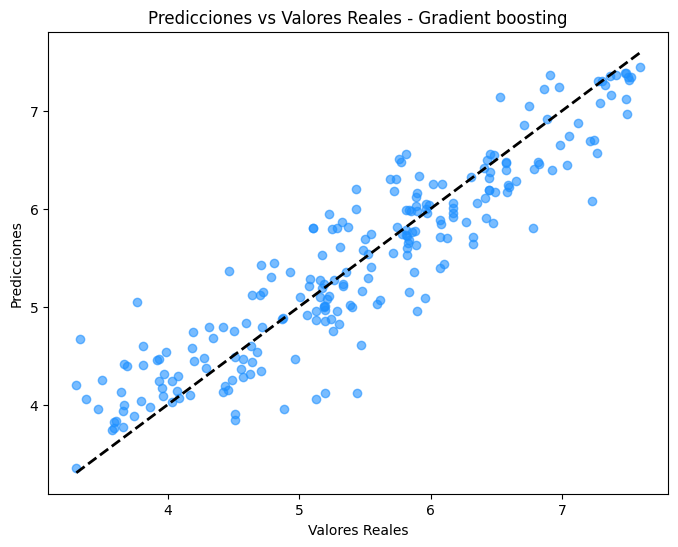

In [16]:
# Generar predicciones con el mejor modelo
y_pred_gb = model_rfr.predict(X_test)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color="dodgerblue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales - Gradient boosting")
plt.show()


En este gráfico de **Predicciones vs. Valores Reales** para el modelo de **Gradient boosting**, se observa que la mayoría de los puntos están cerca de la línea diagonal punteada, lo cual indica que las predicciones del modelo están bastante alineadas con los valores reales. Esto sugiere que el modelo tiene un buen rendimiento y que las predicciones son razonablemente precisas. Sin embargo, aún hay cierta dispersión, especialmente en valores bajos, lo que muestra que algunas predicciones pueden estar algo desviadas de los valores reales.

Gráfica de Distribución de Errores (Residuals).

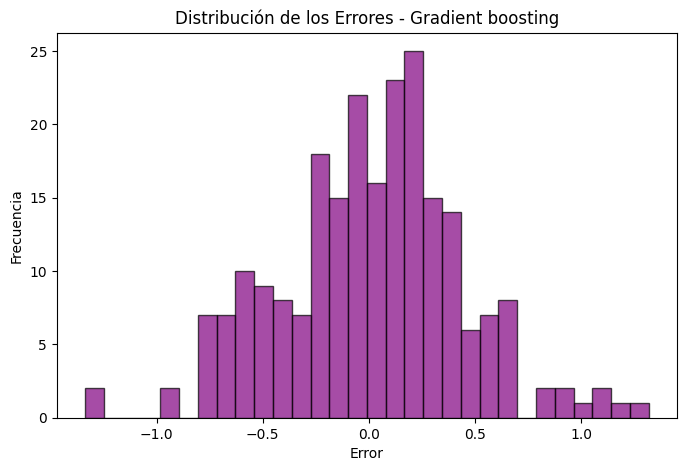

In [17]:
# Calcular los residuos (errores) para el mejor modelo
errores_gb = y_test - y_pred_gb

# Histograma de los errores
plt.figure(figsize=(8, 5))
plt.hist(errores_gb, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.title("Distribución de los Errores - Gradient boosting")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.show()

En este histograma de la Distribución de los Errores para el modelo de Gradient boosting, observamos que la mayoría de los errores están cerca de cero, lo cual es una señal positiva de que el modelo está haciendo predicciones precisas en general. La forma simétrica y centrada alrededor de cero indica que los errores se distribuyen de manera relativamente balanceada, sin un sesgo claro hacia sobrepredicción o subpredicción.